# Introduction

### Author: Michael Saulon B (MSB46)

Begin by running the code cell below to set up code checking and the filepaths for the dataset.

In [388]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex7 import *

# Set up filepaths
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 

In [389]:
# Import helpful libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, time, random, datetime

from sklearn.model_selection import GridSearchCV

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.feature_selection import VarianceThreshold
import random
import warnings
warnings.filterwarnings('ignore')

In [390]:
# path to file you will use for predictions
test_data_path = '../input/test.csv'
# read test data file using pandas
test_data = pd.read_csv(test_data_path)

In [391]:
# Load the data, and separate the target
iowa_file_path = '../input/train.csv'
home_data = pd.read_csv(iowa_file_path)

# Create X 
# features = ['Id','SalePrice','LotArea','Street', 'Alley', 'LotShape', 'LotConfig','CentralAir','1stFlrSF', '2ndFlrSF', 
#             'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'HouseStyle', 'OverallQual', 'Neighborhood', 
#             'GrLivArea','FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath','TotalBsmtSF', 'BsmtQual', 'BedroomAbvGr',
#             'GarageCars','GarageArea','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','PoolArea','MiscFeature','MiscVal']

# test_features = features.copy()
# test_features.remove('SalePrice')

# # Select columns corresponding to features, and preview the data
# my_df = home_data[features]
# test_df = test_data[test_features]

# my_df.head()

In [392]:
my_df = home_data
test_df = test_data

In [393]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [394]:
def print_null_columns(df):
    null_list = []
    for c in df:
        if df[c].isnull().any():
            print(c)
            null_list.append(c)
    if len(null_list) == 0:
        print("There are no columns containing null values.")

In [395]:
# my_df.isnull().any()
print_null_columns(my_df)
# NaN values in SalePrice will still be present to momentarily differentiate train and test data (we will merge them eventually)
# NaN values in TotalBsmtSF can equal to having no basement (0 sq ft)
# NaN values in MiscFeature can equal to the house having no special features

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


# Street

In [396]:
my_df["Street"].describe()

count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object

# Alley

<AxesSubplot:xlabel='count', ylabel='Alley'>

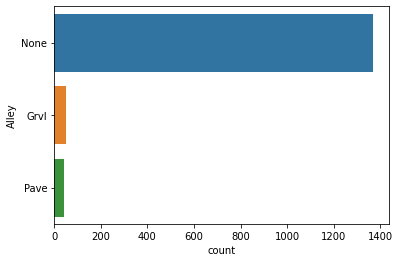

In [397]:
my_df["Alley"] = my_df["Alley"].fillna("None")
test_df["Alley"] = test_df["Alley"].fillna("None")

sns.countplot(y=my_df["Alley"])

# LotShape

<AxesSubplot:xlabel='count', ylabel='LotShape'>

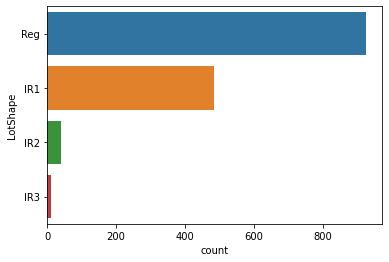

In [398]:
sns.countplot(y=my_df["LotShape"])

<AxesSubplot:xlabel='count', ylabel='LotConfig'>

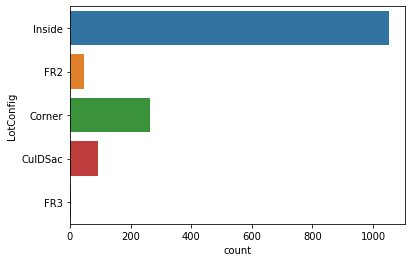

In [399]:
sns.countplot(y=my_df["LotConfig"])

# Misc Features

In [400]:
my_df["MiscFeature"] = my_df["MiscFeature"].fillna("None")
test_df["MiscFeature"] = test_df["MiscFeature"].fillna("None")

my_df["MiscFeature"].describe()

count     1460
unique       5
top       None
freq      1406
Name: MiscFeature, dtype: object

<AxesSubplot:xlabel='count', ylabel='MiscFeature'>

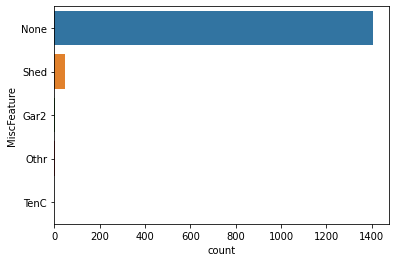

In [401]:
sns.countplot(y=my_df["MiscFeature"])

<AxesSubplot:ylabel='MiscVal'>

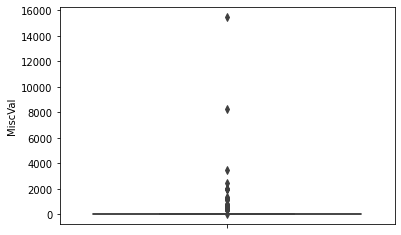

In [402]:
sns.boxplot(y=my_df["MiscVal"])

<AxesSubplot:ylabel='MiscVal'>

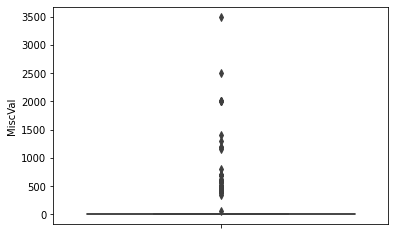

In [403]:
my_df = my_df[my_df["MiscVal"] <= 7000]
sns.boxplot(y=my_df["MiscVal"])

# LotArea: Lot size in square feet

<AxesSubplot:ylabel='LotArea'>

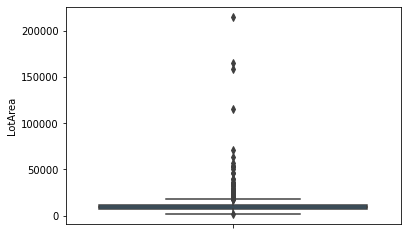

In [404]:
sns.boxplot(y=my_df["LotArea"])

### Notable outliers have more than 100,000 sq ft of lot space

<AxesSubplot:ylabel='LotArea'>

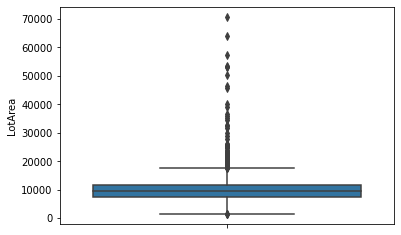

In [405]:
my_df = my_df[my_df["LotArea"] <= 100000]
sns.boxplot(y=my_df["LotArea"])

<AxesSubplot:ylabel='LotFrontage'>

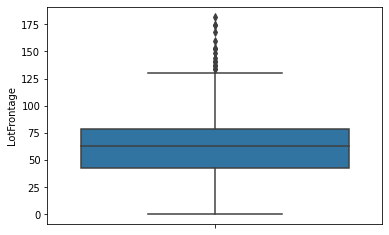

In [406]:
my_df["LotFrontage"] = my_df["LotFrontage"].fillna(0)
test_df["LotFrontage"] = test_df["LotFrontage"].fillna(0)


my_df = my_df[my_df["LotFrontage"] <= 300]

sns.boxplot(y=my_df["LotFrontage"])

# Basement

<AxesSubplot:xlabel='count', ylabel='BsmtCond'>

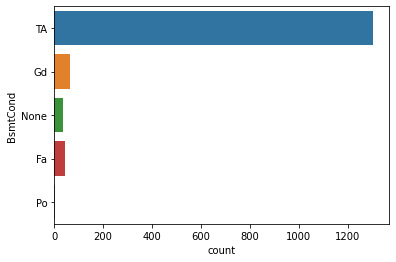

In [407]:
my_df['BsmtCond'].fillna("None",inplace=True)
test_df['BsmtCond'].fillna("None",inplace=True)

sns.countplot(y=my_df["BsmtCond"])

<AxesSubplot:xlabel='count', ylabel='BsmtQual'>

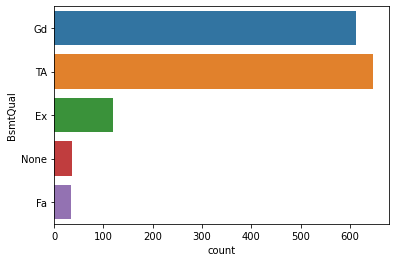

In [408]:
my_df["BsmtQual"].fillna("None",inplace=True)
test_df["BsmtQual"].fillna("None",inplace=True)

sns.countplot(y=my_df["BsmtQual"])

In [409]:
my_df["BsmtFinSF1"].fillna(0,inplace=True)
test_df["BsmtFinSF1"].fillna(0,inplace=True)

my_df["BsmtFinSF2"].fillna(0,inplace=True)
test_df["BsmtFinSF2"].fillna(0,inplace=True)

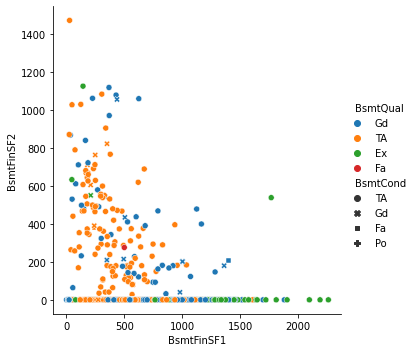

In [410]:
sns.relplot(data=my_df[my_df['BsmtFinSF1'] + my_df['BsmtFinSF2'] > 0], x="BsmtFinSF1", y="BsmtFinSF2", hue="BsmtQual", style="BsmtCond")

In [411]:
my_df["BsmtFinType1"].fillna("None",inplace=True)
test_df["BsmtFinType1"].fillna("None",inplace=True)

my_df["BsmtFinType2"].fillna("None",inplace=True)
test_df["BsmtFinType2"].fillna("None",inplace=True)

<AxesSubplot:xlabel='count', ylabel='BsmtFinType1'>

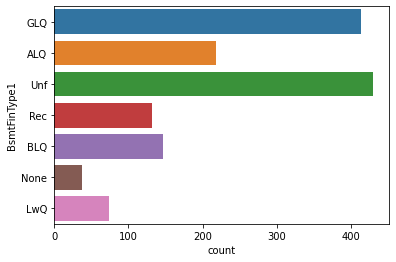

In [412]:
sns.countplot(y=my_df["BsmtFinType1"])

<AxesSubplot:xlabel='count', ylabel='BsmtFinType2'>

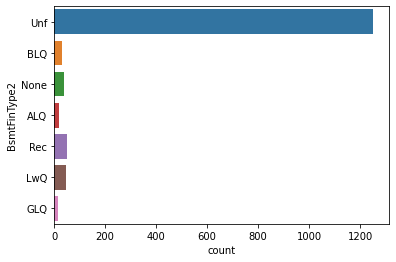

In [413]:
sns.countplot(y=my_df["BsmtFinType2"])

<AxesSubplot:ylabel='BsmtUnfSF'>

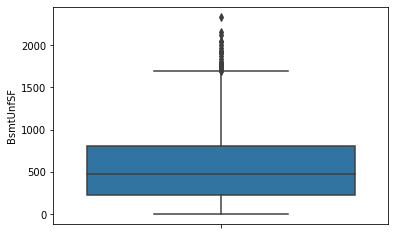

In [414]:
my_df["BsmtUnfSF"].fillna(0,inplace=True)
test_df["BsmtUnfSF"].fillna(0,inplace=True)

sns.boxplot(y=my_df["BsmtUnfSF"])

<AxesSubplot:xlabel='count', ylabel='BsmtExposure'>

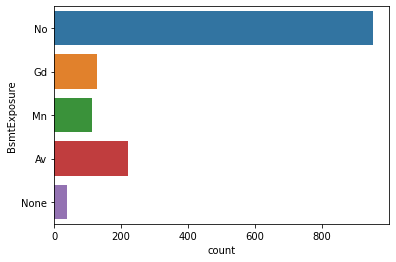

In [415]:
my_df["BsmtExposure"].fillna("None",inplace=True)
test_df["BsmtExposure"].fillna("None",inplace=True)

sns.countplot(y=my_df["BsmtExposure"])

<AxesSubplot:ylabel='TotalBsmtSF'>

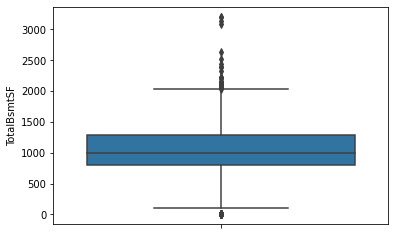

In [416]:
my_df["TotalBsmtSF"].fillna(0,inplace=True)
test_df["TotalBsmtSF"].fillna(0,inplace=True)

sns.boxplot(y=my_df["TotalBsmtSF"])

<AxesSubplot:ylabel='TotalBsmtSF'>

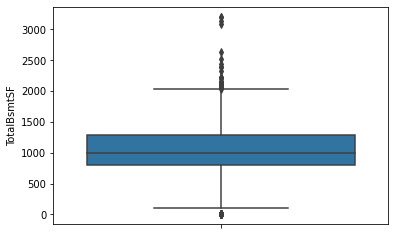

In [417]:
my_df = my_df[my_df["TotalBsmtSF"] <= 5000]
sns.boxplot(y=my_df["TotalBsmtSF"])

<AxesSubplot:xlabel='count', ylabel='BsmtQual'>

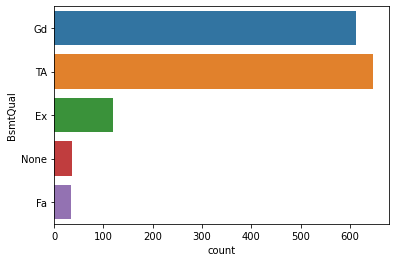

In [418]:
my_df['BsmtQual'].fillna("None",inplace=True)
sns.countplot(y=my_df["BsmtQual"])

# 1stFlrSF and 2ndFlrSF <-- How much space does the house's floor have?

<AxesSubplot:ylabel='TotalFlrSF'>

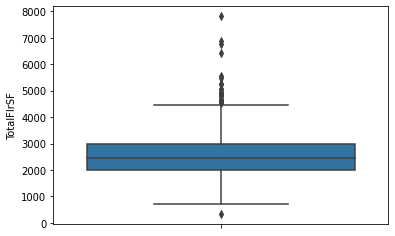

In [419]:
my_df['TotalFlrSF'] = my_df['1stFlrSF'] + my_df['2ndFlrSF'] + my_df["TotalBsmtSF"]
my_df['Has2ndFlr'] = my_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

test_df['TotalFlrSF'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df["TotalBsmtSF"]
test_df['Has2ndFlr'] = test_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

sns.boxplot(y=my_df["TotalFlrSF"])

<AxesSubplot:xlabel='count', ylabel='CentralAir'>

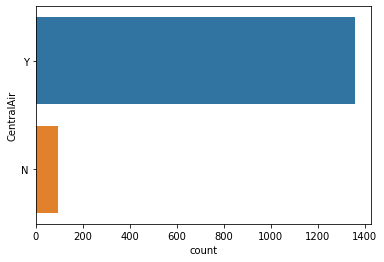

In [420]:
sns.countplot(y=my_df["CentralAir"])

# YearBuilt: Self-explanatory

<AxesSubplot:ylabel='YearBuilt'>

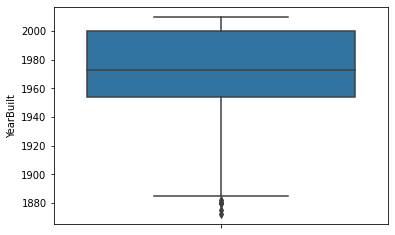

In [421]:
sns.boxplot(y=my_df["YearBuilt"])

<AxesSubplot:xlabel='count', ylabel='Decade'>

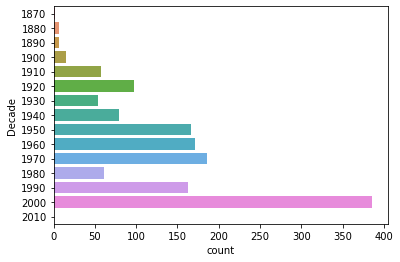

In [422]:
# Decade: The decade the house was built

my_df['Decade'] = my_df['YearBuilt'] // 10 * 10
test_df['Decade'] = test_df['YearBuilt'] // 10 * 10

sns.countplot(y=my_df["Decade"])

# YearRemodAdd <- Year house was remodeled. The year is same as YearBuilt if the house had no remodeling.
## Idea: Create a new column that determines if a house has been remodeled at all

<AxesSubplot:ylabel='YearBuilt'>

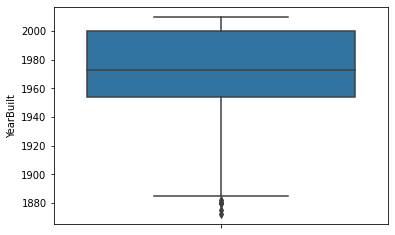

In [423]:
sns.boxplot(y=my_df["YearBuilt"])

In [424]:
my_df['Remodeled'] = my_df['YearRemodAdd'] - my_df['YearBuilt']
my_df['Remodeled'] = my_df['Remodeled'].apply(lambda x: 0 if x == 0 else 1)

test_df['Remodeled'] = test_df['YearRemodAdd'] - test_df['YearBuilt']
test_df['Remodeled'] = test_df['Remodeled'].apply(lambda x: 0 if x == 0 else 1)

# MsnVnrType

<AxesSubplot:xlabel='count', ylabel='MasVnrType'>

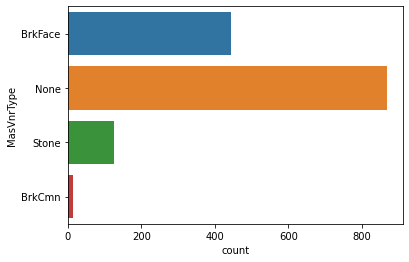

In [425]:
my_df['MasVnrType'].fillna("None",inplace=True)
test_df['MasVnrType'].fillna("None",inplace=True)

sns.countplot(y=my_df["MasVnrType"])

# MasVnrArea

<AxesSubplot:ylabel='MasVnrArea'>

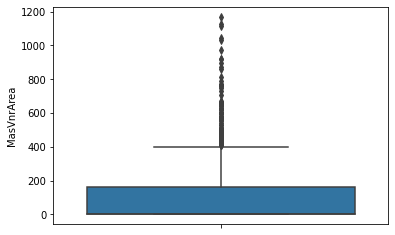

In [426]:
my_df['MasVnrArea'].fillna(0,inplace=True)
test_df['MasVnrArea'].fillna(0,inplace=True)

my_df = my_df[my_df["MasVnrArea"] <= 1300]

sns.boxplot(y=my_df["MasVnrArea"])

<AxesSubplot:xlabel='count', ylabel='HouseStyle'>

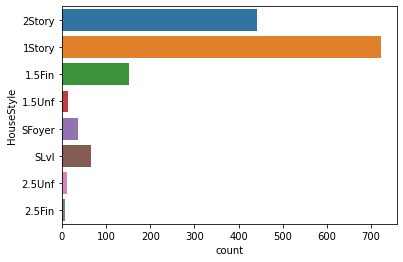

In [427]:
sns.countplot(y=my_df["HouseStyle"])

# Overall Quality

<AxesSubplot:xlabel='count', ylabel='OverallQual'>

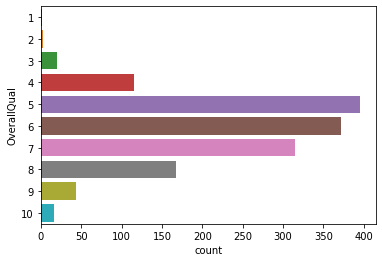

In [428]:
sns.countplot(y=my_df["OverallQual"])

# Total Rooms Above Grade

<AxesSubplot:xlabel='count', ylabel='TotRmsAbvGrd'>

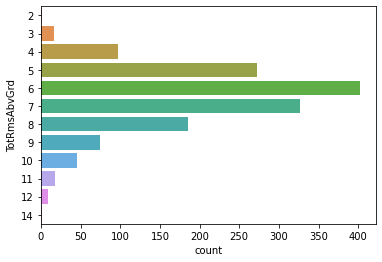

In [429]:
sns.countplot(y=my_df["TotRmsAbvGrd"])

<AxesSubplot:ylabel='AvgSqftPerRoom'>

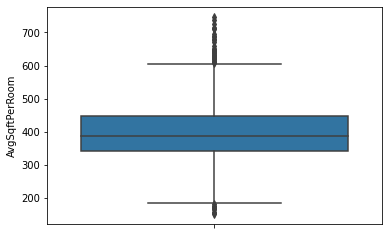

In [430]:
my_df['AvgSqftPerRoom'] = my_df['TotalFlrSF'] / my_df['TotRmsAbvGrd']
test_df['AvgSqftPerRoom'] = test_df['TotalFlrSF'] / test_df['TotRmsAbvGrd']

sns.boxplot(y=my_df["AvgSqftPerRoom"])

# Neighborhood

<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

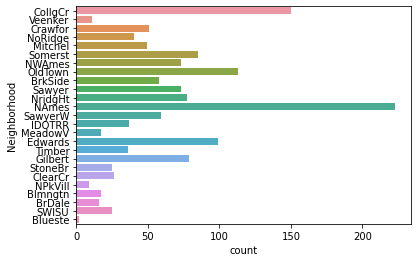

In [431]:
sns.countplot(y=my_df["Neighborhood"])

# Full Bath

<AxesSubplot:xlabel='count', ylabel='FullBath'>

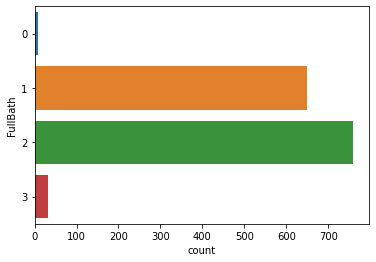

In [432]:
sns.countplot(y=my_df["FullBath"])

# Bathrooms

<AxesSubplot:xlabel='count', ylabel='FullBath'>

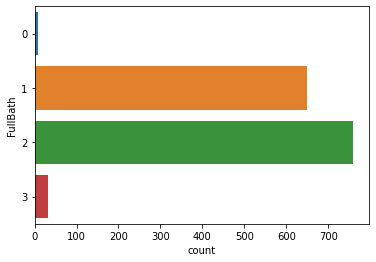

In [433]:
my_df["FullBath"].fillna(0,inplace=True)
test_df["FullBath"].fillna(0,inplace=True)

sns.countplot(y=my_df["FullBath"])

<AxesSubplot:xlabel='count', ylabel='HalfBath'>

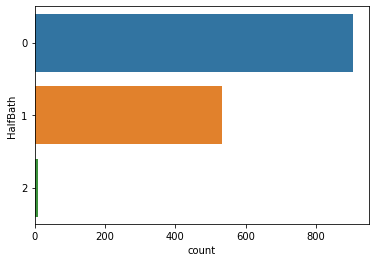

In [434]:
my_df["HalfBath"].fillna(0,inplace=True)
test_df["HalfBath"].fillna(0,inplace=True)

sns.countplot(y=my_df["HalfBath"])

<AxesSubplot:xlabel='count', ylabel='BsmtFullBath'>

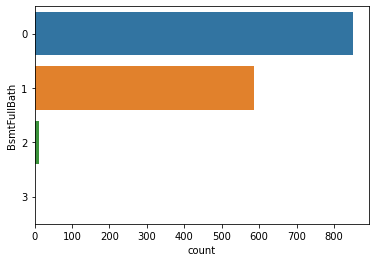

In [435]:
my_df["BsmtFullBath"].fillna(0,inplace=True)
test_df["BsmtFullBath"].fillna(0,inplace=True)

sns.countplot(y=my_df["BsmtFullBath"])

<AxesSubplot:xlabel='count', ylabel='BsmtHalfBath'>

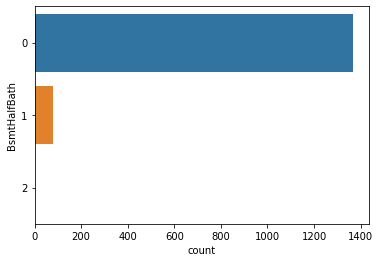

In [436]:
my_df["BsmtHalfBath"].fillna(0,inplace=True)
test_df["BsmtHalfBath"].fillna(0,inplace=True)

sns.countplot(y=my_df["BsmtHalfBath"])

<AxesSubplot:xlabel='count', ylabel='TotalBath'>

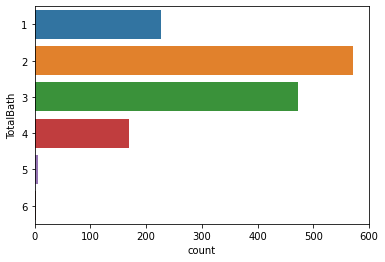

In [437]:
my_df['TotalBath'] = my_df['FullBath'] + my_df['HalfBath'] + my_df['BsmtFullBath'] + my_df['BsmtHalfBath']
test_df['TotalBath'] = test_df['FullBath'] + test_df['HalfBath'] + test_df['BsmtFullBath'] + test_df['BsmtHalfBath']

sns.countplot(y=my_df["TotalBath"])

# Bedrooms

<AxesSubplot:xlabel='count', ylabel='BedroomAbvGr'>

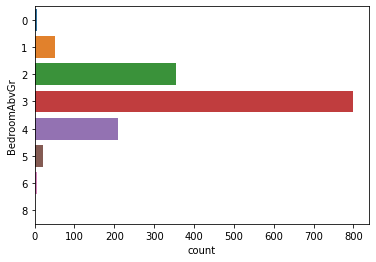

In [438]:
sns.countplot(y=my_df["BedroomAbvGr"])

# Garage

<AxesSubplot:xlabel='count', ylabel='GarageType'>

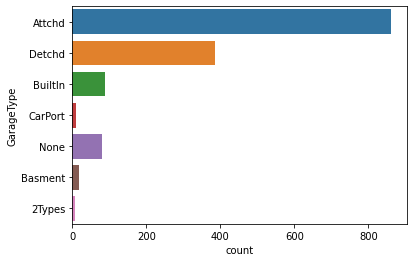

In [439]:
my_df["GarageType"].fillna("None",inplace=True)
test_df["GarageType"].fillna("None",inplace=True)

sns.countplot(y=my_df["GarageType"])

<AxesSubplot:xlabel='count', ylabel='GarageFinish'>

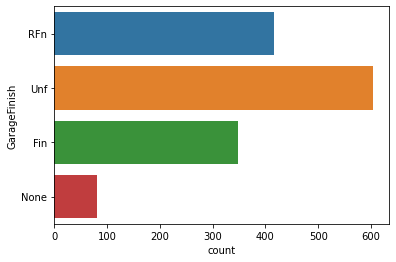

In [440]:
my_df["GarageFinish"].fillna("None",inplace=True)
test_df["GarageFinish"].fillna("None",inplace=True)

sns.countplot(y=my_df["GarageFinish"])

<AxesSubplot:xlabel='count', ylabel='GarageQual'>

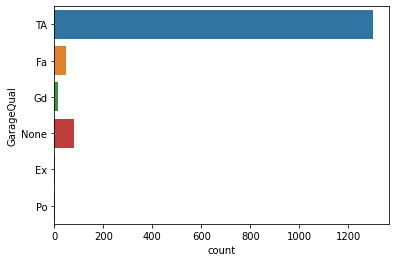

In [441]:
my_df["GarageQual"].fillna("None",inplace=True)
test_df["GarageQual"].fillna("None",inplace=True)

sns.countplot(y=my_df["GarageQual"])

<AxesSubplot:xlabel='count', ylabel='GarageCond'>

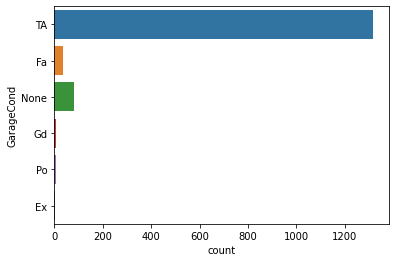

In [442]:
my_df["GarageCond"].fillna("None",inplace=True)
test_df["GarageCond"].fillna("None",inplace=True)

sns.countplot(y=my_df["GarageCond"])

<AxesSubplot:xlabel='count', ylabel='GarageCars'>

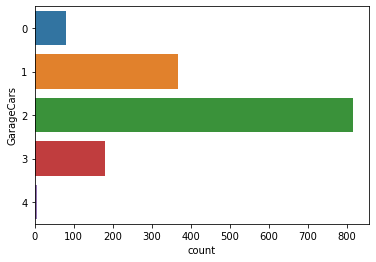

In [443]:
my_df["GarageCars"].fillna(0,inplace=True)
test_df["GarageCars"].fillna(0,inplace=True)

sns.countplot(y=my_df["GarageCars"])

<AxesSubplot:ylabel='GarageArea'>

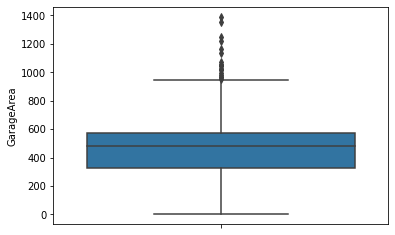

In [444]:
my_df["GarageArea"].fillna(0,inplace=True)
test_df["GarageArea"].fillna(0,inplace=True)
sns.boxplot(y=my_df["GarageArea"])

<AxesSubplot:ylabel='GarageYrBlt'>

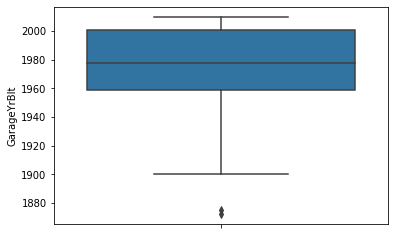

In [445]:
my_df["GarageYrBlt"].fillna(my_df["YearBuilt"],inplace=True)
test_df["GarageYrBlt"].fillna(test_df["YearBuilt"],inplace=True)
sns.boxplot(y=my_df["GarageYrBlt"])

# Kitchen

<AxesSubplot:xlabel='count', ylabel='KitchenAbvGr'>

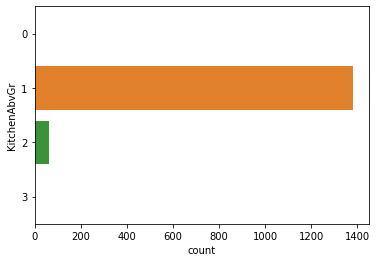

In [446]:
sns.countplot(y=my_df["KitchenAbvGr"])

<AxesSubplot:xlabel='count', ylabel='Electrical'>

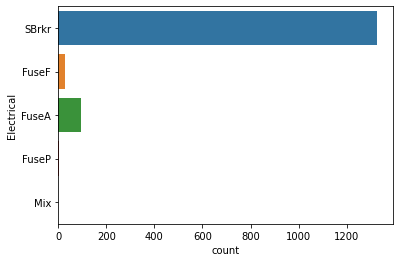

In [447]:
# Electrical
my_df["Electrical"].fillna("SBrkr",inplace=True)
test_df["Electrical"].fillna("SBrkr",inplace=True)

sns.countplot(y=my_df["Electrical"])

# Fireplace

<AxesSubplot:xlabel='count', ylabel='Fireplaces'>

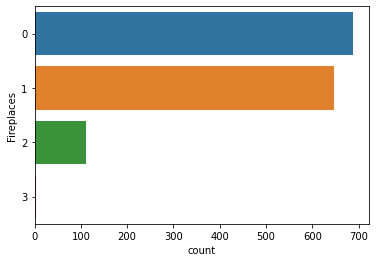

In [448]:
sns.countplot(y=my_df["Fireplaces"])

<AxesSubplot:xlabel='count', ylabel='FireplaceQu'>

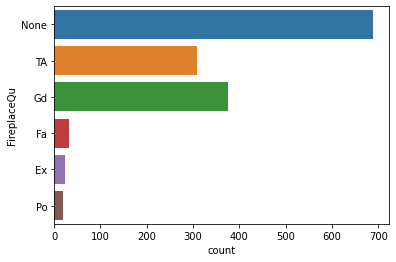

In [449]:
my_df["FireplaceQu"].fillna("None",inplace=True)
test_df["FireplaceQu"].fillna("None",inplace=True)

sns.countplot(y=my_df["FireplaceQu"])

# Pool

<AxesSubplot:xlabel='count', ylabel='PoolQC'>

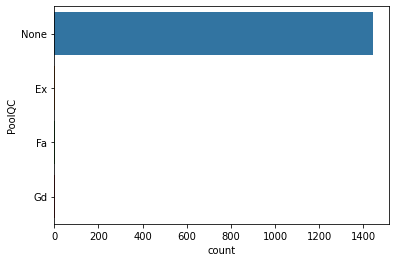

In [450]:
my_df["PoolQC"].fillna("None",inplace=True)
test_df["PoolQC"].fillna("None",inplace=True)

sns.countplot(y=my_df["PoolQC"])

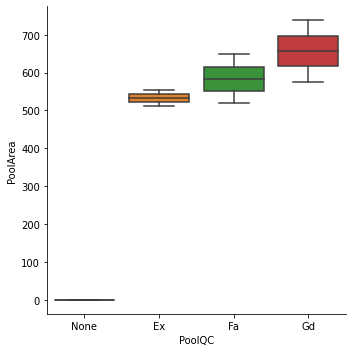

In [451]:
sns.catplot(data=my_df, x="PoolQC", y="PoolArea" ,kind="box")

# Fence

<AxesSubplot:xlabel='count', ylabel='PoolQC'>

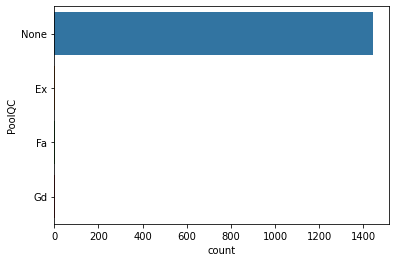

In [452]:
my_df["Fence"].fillna("None",inplace=True)
test_df["Fence"].fillna("None",inplace=True)

sns.countplot(y=my_df["PoolQC"])

# Ground Living Area

<AxesSubplot:ylabel='GrLivArea'>

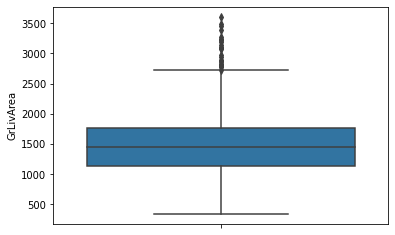

In [453]:
my_df = my_df[my_df["GrLivArea"] <= 4000]
sns.boxplot(y=my_df["GrLivArea"])

In [454]:
print_null_columns(my_df)

There are no columns containing null values.


In [455]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1459
Data columns (total 87 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1447 non-null   int64  
 1   MSSubClass      1447 non-null   int64  
 2   MSZoning        1447 non-null   object 
 3   LotFrontage     1447 non-null   float64
 4   LotArea         1447 non-null   int64  
 5   Street          1447 non-null   object 
 6   Alley           1447 non-null   object 
 7   LotShape        1447 non-null   object 
 8   LandContour     1447 non-null   object 
 9   Utilities       1447 non-null   object 
 10  LotConfig       1447 non-null   object 
 11  LandSlope       1447 non-null   object 
 12  Neighborhood    1447 non-null   object 
 13  Condition1      1447 non-null   object 
 14  Condition2      1447 non-null   object 
 15  BldgType        1447 non-null   object 
 16  HouseStyle      1447 non-null   object 
 17  OverallQual     1447 non-null   i

In [456]:
new_df = pd.concat([my_df,test_df],sort=False)

In [457]:
my_dummies = pd.get_dummies(new_df)

In [458]:
my_dummies.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalFlrSF,Has2ndFlr,Decade,Remodeled,AvgSqftPerRoom,TotalBath,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_Built

In [459]:
# my_dummies.info()

In [460]:
training = my_dummies[my_dummies['SalePrice'].notna()]
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1459
Columns: 308 entries, Id to SaleCondition_Partial
dtypes: float64(15), int64(29), uint8(264)
memory usage: 881.8 KB


In [461]:
testing = my_dummies[my_dummies['SalePrice'].isna()]
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 308 entries, Id to SaleCondition_Partial
dtypes: float64(15), int64(29), uint8(264)
memory usage: 889.1 KB


# Train the model

Before submitting, run a check to make sure your `test_preds` have the right format and that there are no rows containing null values.

In [462]:
training[training.isna().any(axis=1)]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalFlrSF,Has2ndFlr,Decade,Remodeled,AvgSqftPerRoom,TotalBath,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_Built

In [463]:
X_train, X_test, y_train, y_test = train_test_split(training.drop(['Id','SalePrice'],axis=1), 
                                                    training['SalePrice'], test_size=0.30, 
                                                    random_state=random.randint(1,1000))

# Finding the most suitable model

In [464]:
# Logistic Regression
log_model = LogisticRegression(random_state=random.randint(1,1000))
log_model.fit(X_train, y_train)
log_val_predictions = log_model.predict(X_test)
log_val_mae = mean_absolute_error(log_val_predictions, y_test)

print("Validation MAE for Logistic Regression Model: {:,.0f}".format(log_val_mae))

Validation MAE for Logistic Regression Model: 37,803


In [468]:
# K-Neighbors
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_val_predictions = knn_model.predict(X_test)
knn_val_mae = mean_absolute_error(knn_val_predictions, y_test)

print("Validation MAE for K-Neighbors Model: {:,.0f}".format(knn_val_mae))

Validation MAE for K-Neighbors Model: 27,002


In [470]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_val_predictions = gnb_model.predict(X_test)
gnb_val_mae = mean_absolute_error(gnb_val_predictions, y_test)

print("Validation MAE for Gaussian Native Bayes Model: {:,.0f}".format(gnb_val_mae))

Validation MAE for Gaussian Native Bayes Model: 32,894


In [471]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=random.randint(1,1000))
dt_model.fit(X_train, y_train)
dt_val_predictions = dt_model.predict(X_test)
dt_val_mae = mean_absolute_error(dt_val_predictions, y_test)

print("Validation MAE for Decision Tree Regressor Model: {:,.0f}".format(dt_val_mae))

Validation MAE for Decision Tree Regressor Model: 26,430


In [473]:
# XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=5000,random_state=random.randint(1,1000),learning_rate = 0.01, 
                             subsample=0.3, n_jobs=4)
xgb_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

xgb_val_predictions = xgb_model.predict(X_test)
xgb_val_mae = mean_absolute_error(xgb_val_predictions, y_test)

print("Validation MAE for XGBRF Model: {:,.0f}".format(xgb_val_mae))
print("Model score for XGBRF Model: {:,.0f}".format(round(xgb_model.score(X_train, y_train) * 100, 2)))
# print("CV score for XGBRF Model: {:,.0f}".format(round(metrics.accuracy_score(y_train, train_pred) * 100, 2)))

Validation MAE for XGBRF Model: 14,076
Model score for XGBRF Model: 98


In [474]:
# Random Forest Regressor
rfr_model = RandomForestRegressor(random_state=random.randint(1,1000), n_estimators=100)

# fit rf_model_on_full_data on all data from the training data
my_df.shape
rfr_model.fit(X_train, y_train)
rfr_val_predictions = rfr_model.predict(X_test)
rfr_val_mae = mean_absolute_error(rfr_val_predictions, y_test)

print("Validation MAE for Random Forest Regressor Model: {:,.0f}".format(rfr_val_mae))
print("Model score for Random Forest Regressor Model: {:,.0f}".format(round(rfr_model.score(X_train, y_train) * 100, 2)))

Validation MAE for Random Forest Regressor Model: 16,159
Model score for Random Forest Regressor Model: 99


In [475]:
gbr_model = GradientBoostingRegressor(random_state=random.randint(1,1000), n_estimators=5000, loss='squared_error', 
                                      subsample = 0.341, learning_rate = 0.01)

gbr_model.fit(X_train,y_train)
gbr_val_predictions = gbr_model.predict(X_test)
gbr_val_mae = mean_absolute_error(gbr_val_predictions, y_test)

print("Validation MAE for Gradient Boost Regressor Model: {:,.0f}".format(gbr_val_mae))

Validation MAE for Gradient Boost Regressor Model: 13,521


In [476]:
cat_model = CatBoostRegressor(random_state=random.randint(1,1000), iterations=5000, 
                                subsample = 0.341, learning_rate = 0.01, verbose=False)

cat_model.fit(X_train,y_train)
cat_val_predictions = cat_model.predict(X_test)
cat_val_mae = mean_absolute_error(cat_val_predictions, y_test)

print("Validation MAE for Cat Boost Regressor Model: {:,.0f}".format(cat_val_mae))

Validation MAE for Cat Boost Regressor Model: 13,799


Now, read the file of "test" data, and apply your model to make predictions.

In [ ]:
temp = testing.drop(['Id', 'SalePrice'], axis = 1)

temp[temp.isna().any(axis=1)]
# There should be no data in the following dataframe if there are no missing values on a row

In [ ]:
pred = gbr_model.predict(temp)
Id = testing['Id']

# Generate a submission

Run the code cell below to generate a CSV file with your predictions that you can use to submit to the competition.

In [ ]:
# Run the code to save predictions in the format used for competition scoring

output = pd.DataFrame({'Id': Id,
                       'SalePrice': pred})
output.to_csv('submission.csv', index=False)

output